In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline 


Задание 1

Вычислите производную функции:

$f(x) = tg^2(sin(x))+cos(2x+3)$

в точке $x_0=1$

In [ ]:
from scipy.misc import derivative
import sympy as sym

In [ ]:
x= sym.Symbol('x')
f = sym.tan(sym.sin(x))**2+sym.cos(2*x+3)
f

cos(2*x + 3) + tan(sin(x))**2

In [ ]:
f1 = f.diff(x).evalf(subs={'x': 1})
f1

4.64084346529635

In [ ]:
def function(x):
  return np.tan(np.sin(x))**2+np.cos(2*x+3)

In [ ]:
y = np.linspace(-10, 10)

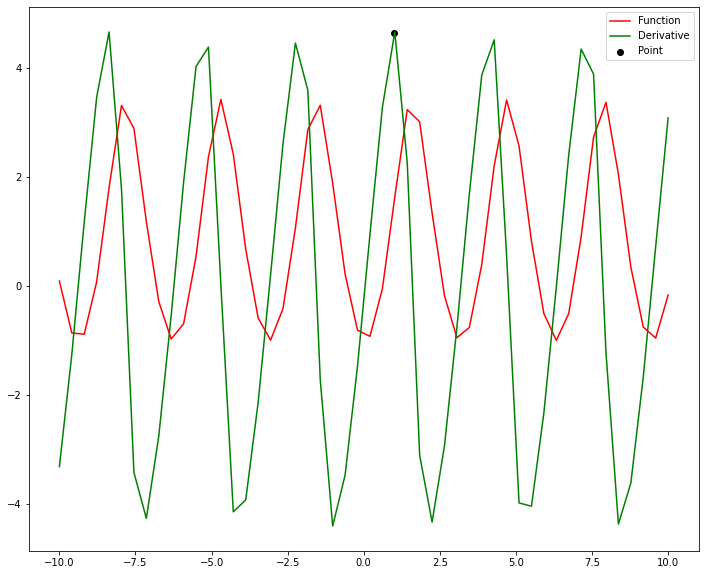

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(y, function(y), color='red', label='Function')
plt.plot(y, derivative(function, y, dx=1e-6), color='green', label='Derivative')
plt.scatter(1, derivative(function, 1, dx=1e-6), color='black', label='Point')
plt.legend()
plt.show()

In [ ]:
derivative(function, 1.0, dx=1e-6)

4.640843465630873


Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

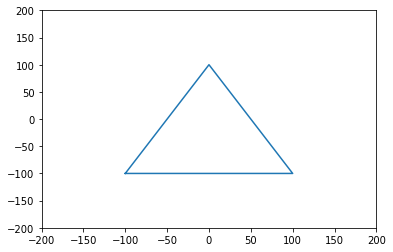

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 


При помощи матричных операций выполните:

Смещение объекта и масштабирование (применить 2 матрицы трансформаций). 

Смещение на (200, 300) и масштабирование на (0.5, 1,2)



In [ ]:
D = np.array([[1,0,0],[0,1,0],[200,300,1]])
A = A@D

In [ ]:
S = np.array([[0.5,0,0],[0,1.2,0], [0,0,1]])
A = A@S

(-500.0, 500.0)

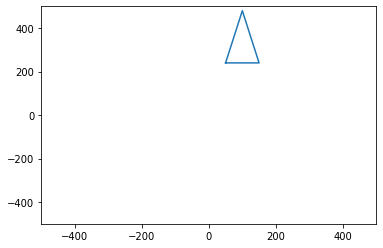

In [ ]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500]) 

Задание 3

Найдите собственные значения и собственные вектора матрицы:


In [ ]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [ ]:
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

Задание 4

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

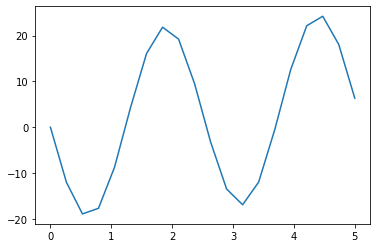

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
res = curve_fit(f, x, fx, p0=np.array([0.,1.]), method='lm')
res[0]

array([ 3. , -2.5])

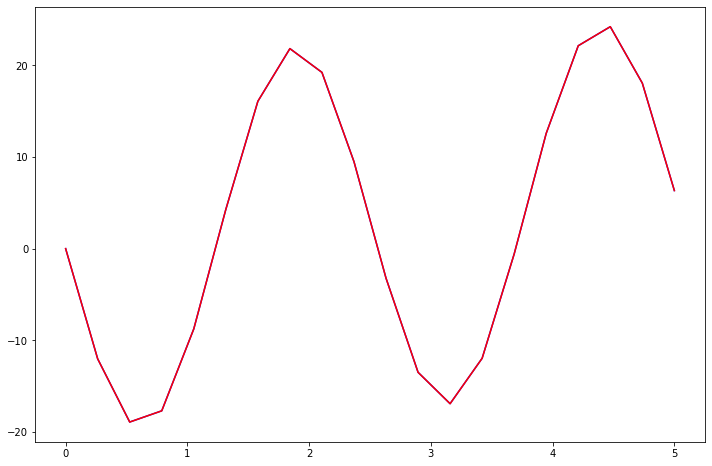

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

In [ ]:
error(res[0])

1.5365230368047378e-06

In [ ]:
## 222

In [ ]:
res1 = minimize(f, x0=np.array([1.1,1.1]), args=(1.,8), method='COBYLA')
res1.x

array([2.15397561, 1.10498636])

In [ ]:
error(res1.x)

244.5552367580256

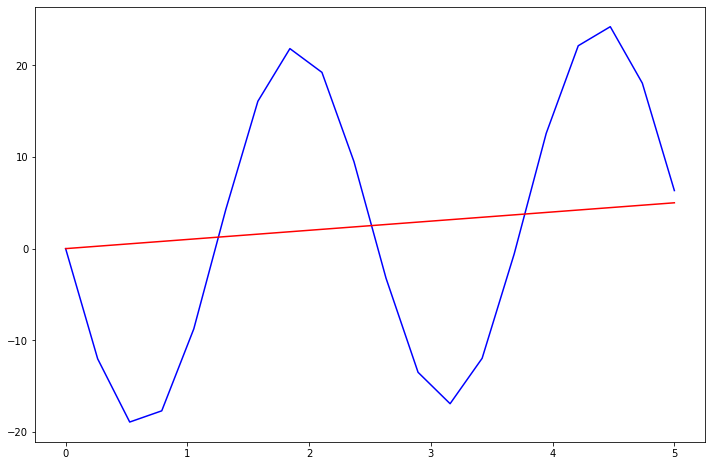

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res1.x[0], res1.x[1]), color='red')
plt.show()

Задание 5

Дана матрица рейтингов фильмов

(строки - пользователи (10 человек), 

столбцы - фильмы (15 фильмов))


In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_distances
from numpy.linalg import norm

In [ ]:
def similar_ratings(rating, list_of_ratings):
  cosine_dict = {}
  for id, r in enumerate(list_of_ratings):
    cosine = np.dot(r, rating) / (norm(r) * norm(rating))
    cosine_dict[id] = cosine
  return cosine_dict

In [ ]:
for id, i in enumerate(raitings):
  result = similar_ratings(raitings[id], raitings)
  result.pop(id)
  print(raitings[id], raitings[max(result, key=result.get)])

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


In [ ]:
import seaborn as sns; sns.set_theme()

In [ ]:
# Метод для поиска косинусного расстояния № 1
pd = pairwise_distances(raitings, metric='cosine')

In [ ]:
# Само решение!
print('Решение!')

n = 1
for i in pd:
  print(f'Пара № {n}')
  print(raitings[i.argsort()[:2]])
  n += 1

Решение!
Пара № 1
[[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]]
Пара № 2
[[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
 [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]]
Пара № 3
[[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
Пара № 4
[[ 6  1  9  7  7  9  2  3  5  1  6  6  3  2  7]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
Пара № 5
[[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]]
Пара № 6
[[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
Пара № 7
[[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
 [ 6  1  9  7  7  9  2  3  5  1  6  6  3  2  7]]
Пара № 8
[[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
 [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]]
Пара № 9
[[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
 [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]]
Пара № 10
[[ 5 10  8  8  9  7  2  9  

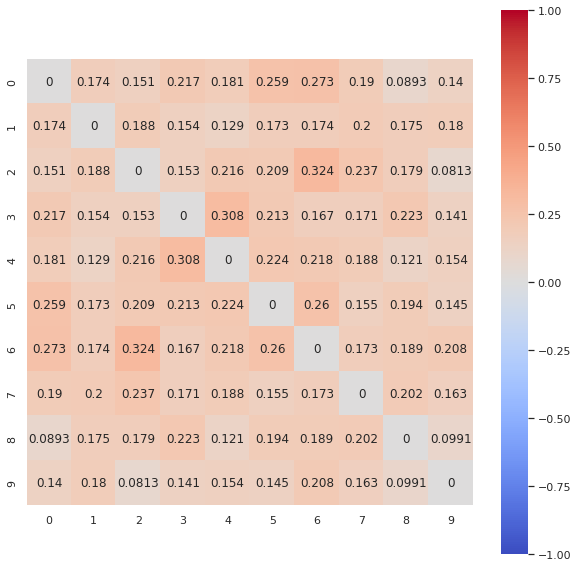

In [ ]:
# Построим тепловую карту для наглядности
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pd, annot=True, fmt='.3g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, square=True)

In [ ]:
# Сравниваю со вторым методом

In [ ]:
cd = cosine_distances(raitings)

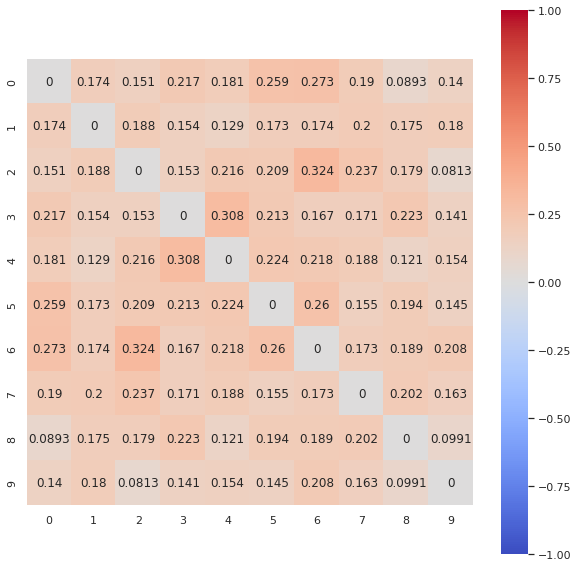

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cd, annot=True, fmt='.3g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, square=True)